In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xarray matplotlib cartopy numpy h5netcdf scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 68.8 MB/s eta 0:00:00


In [3]:
!pip install "xarray[complete]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 1

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import numpy as np
import matplotlib.cm as cm

In [13]:
data = xr.open_mfdataset('/content/drive/MyDrive/Colab Notebooks/data_skripsi/SLA/SLA_Seasonal/SLA_*.nc', combine='nested', concat_dim='time', engine='h5netcdf')
sla = data['sla']*100
lon = data['longitude']
lat = data['latitude']
sla

/tmp/ipython-input-3274618654.py:1: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  data = xr.open_mfdataset('/content/drive/MyDrive/Colab Notebooks/data_skripsi/SLA/SLA_Seasonal/SLA_*.nc', combine='nested', concat_dim='time', engine='h5netcdf')


<xarray.DataArray 'sla' (time: 4, latitude: 18, longitude: 24)> Size: 14kB
dask.array<mul, shape=(4, 18, 24), dtype=float64, chunksize=(1, 18, 24), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 32B 2016-02-15 2016-07-15 ... 2016-10-15
  * longitude  (longitude) float32 96B 109.1 109.2 109.3 ... 111.7 111.8 111.9
  * latitude   (latitude) float32 72B -7.188 -7.062 -6.938 ... -5.188 -5.062

<xarray.DataArray 'sla' (latitude: 18, longitude: 24)> Size: 3kB
dask.array<getitem, shape=(18, 24), dtype=float64, chunksize=(18, 24), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 8B 2016-02-15
  * longitude  (longitude) float32 96B 109.1 109.2 109.3 ... 111.7 111.8 111.9
  * latitude   (latitude) float32 72B -7.188 -7.062 -6.938 ... -5.188 -5.062


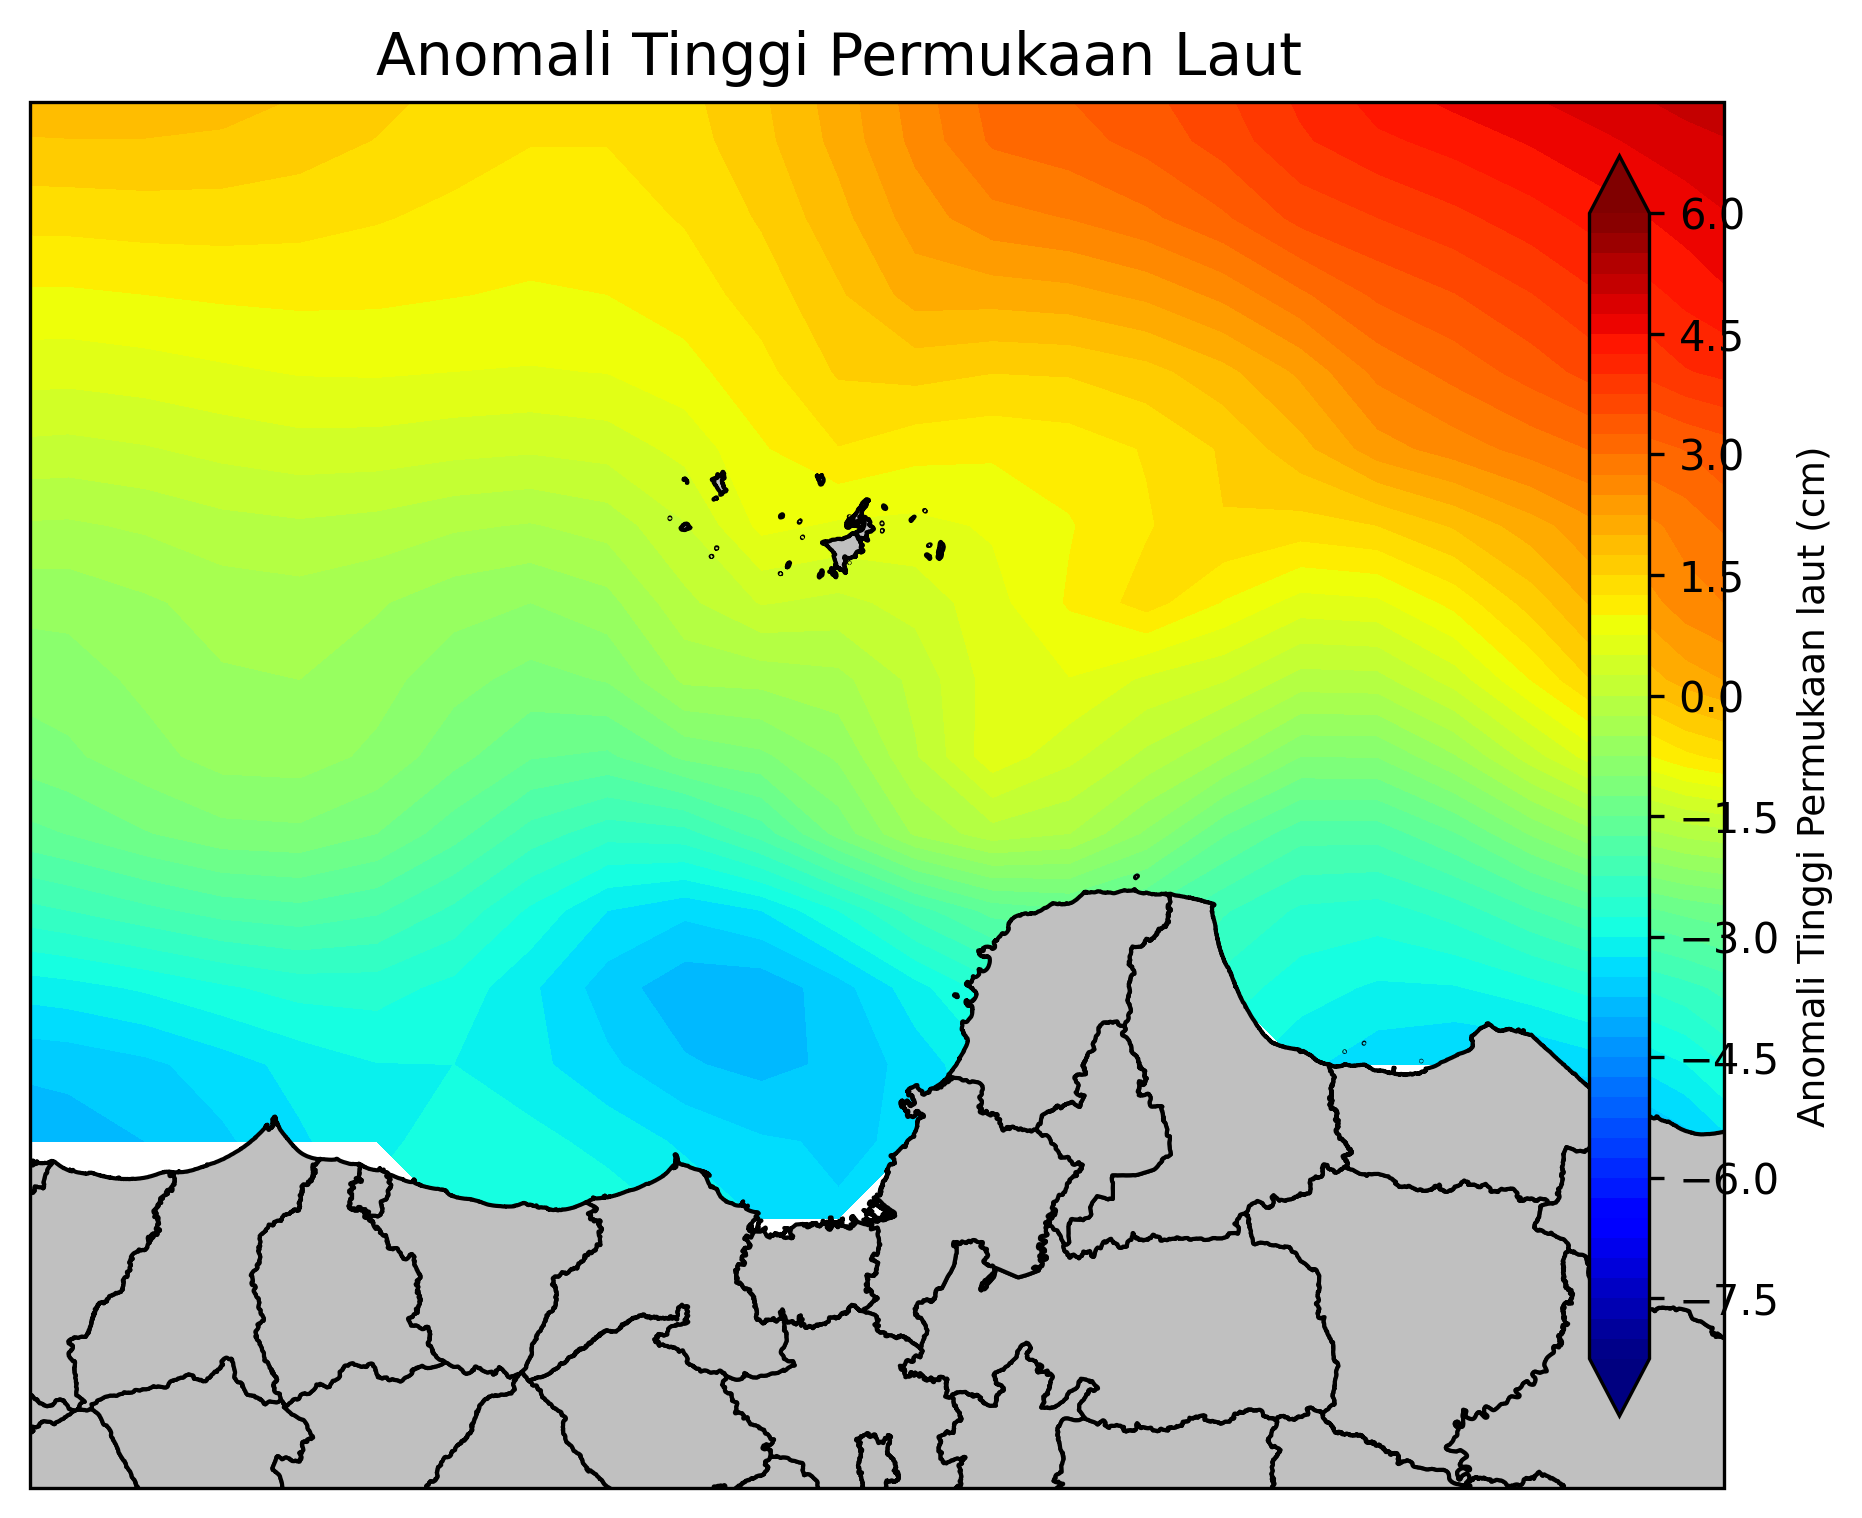

In [17]:
fig = plt.figure(figsize=(10, 6), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

cmap = cm.jet

# Add this line to inspect the data being plotted
print(sla[0])

mesh = ax.contourf(lon, lat, sla[0], # Use sla instead of sst
                   cmap=cmap, levels= np.arange(-8.25, 6.25, 0.25),
                   transform=ccrs.PlateCarree(),
                   extend='both')

shape_feature = ShapelyFeature(Reader('/content/drive/MyDrive/Colab Notebooks/Shapefile/LapakGIS_Batas_Kabupaten_2024.shp').geometries(),
                               ccrs.PlateCarree(), edgecolor="black", facecolor="silver") # Membaca shapefile
ax.add_feature(shape_feature, linewidth=1.0) # Menambahkan shapefile ke peta
ax.set_extent([109.125, 111.875, -7.375, -5.125])
#ax.add_feature(cfeature.COASTLINE, linewidth=2)
#ax.add_feature(cfeature.BORDERS, linewidth=2, linestyle='--')
#ax.set_extent([111, 116, -10, -5], crs=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.75, 0.15, 0.02, 0.7])
cbar = fig.colorbar(mesh, cax=cbar_ax).set_label(label='Anomali Tinggi Permukaan laut (cm)', size=9) # Updated label

plt.suptitle('Anomali Tinggi Permukaan Laut', # Updated title
            fontsize=14, y=0.92)
plt.show()

/tmp/ipython-input-4105851999.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


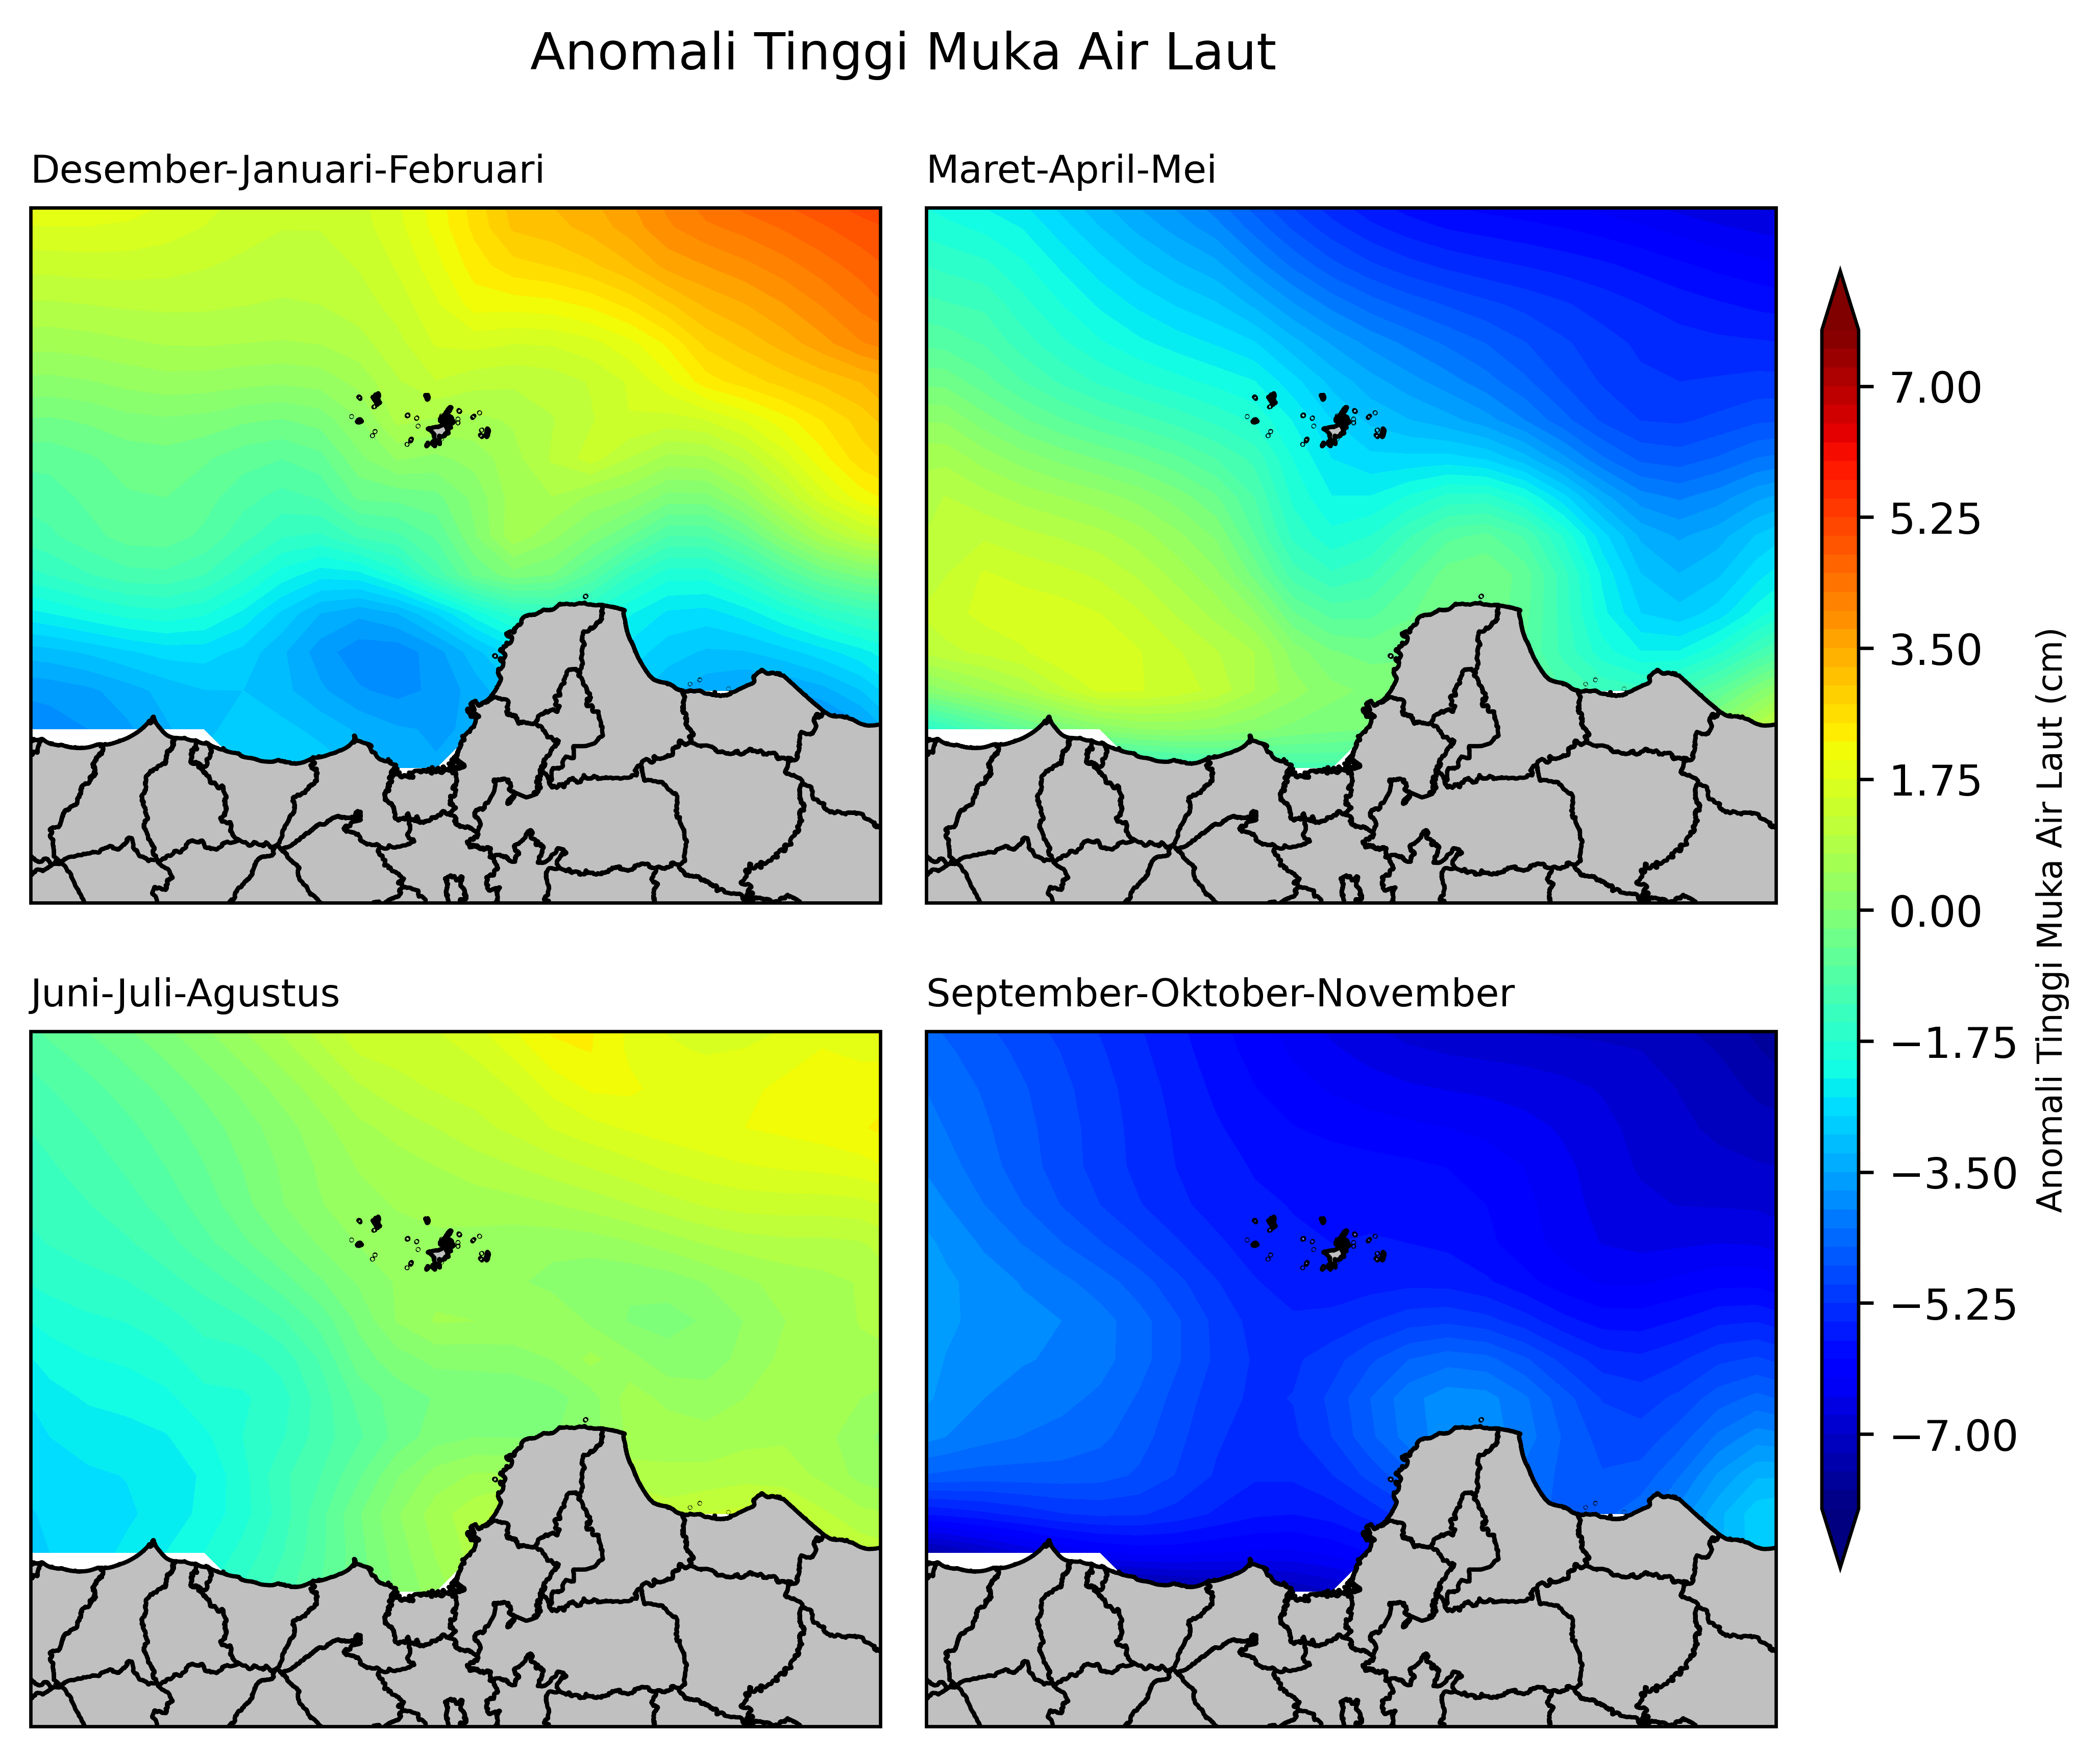

In [16]:
fig = plt.figure(figsize=(6, 6.05), dpi=600) # Add this line to create a figure

cmap = cm.jet # Define the colormap

title = ['Desember-Januari-Februari', 'Maret-April-Mei', 'Juni-Juli-Agustus', 'September-Oktober-November']

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection=ccrs.PlateCarree())
    mesh = ax.contourf(lon, lat, sla.isel(time=i),
    levels= np.arange(-8, 8, 0.25), cmap=cmap,
    transform=ccrs.PlateCarree(), extend = 'both')

    shape_feature = ShapelyFeature(Reader('/content/drive/MyDrive/Colab Notebooks/Shapefile/LapakGIS_Batas_Kabupaten_2024.shp').geometries(),
                                   ccrs.PlateCarree(), edgecolor="black", facecolor="silver") # Membaca shapefile
    ax.add_feature(shape_feature, linewidth=1.0) # Menambahkan shapefile ke peta
    #ax.add_feature(cfeature.COASTLINE, linewidth=2)
    #ax.add_feature(cfeature.BORDERS, linewidth=2, linestyle='--')
    ax.set_extent([109.125, 111.875, -7.375, -5.125], crs=ccrs.PlateCarree())
    # Now you can use pd.to_datetime
    plt.title(title[i], fontsize=9, loc='left') # Changed time to data.time to access the time variable from your xarray dataset

cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label(label='Anomali Tinggi Muka Air Laut (cm)', size=8)

plt.suptitle('Anomali Tinggi Muka Air Laut',
            fontsize=12, ha='center')
plt.tight_layout()
plt.show()

In [5]:
data = xr.open_mfdataset('/content/drive/MyDrive/Colab Notebooks/data_skripsi/SST/*.nc', combine='nested', concat_dim='time', engine='h5netcdf')
sst = data['to']
lon = data['longitude']
lat = data['latitude']
data

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 4, bnds: 2, depth: 50, latitude: 17, longitude: 23)
Coordinates:
  * time       (time) datetime64[ns] 32B 2016-02-15T12:00:00 ... 2016-10-15T1...
  * longitude  (longitude) float64 184B 109.1 109.2 109.4 ... 111.6 111.8 111.9
  * latitude   (latitude) float64 136B -7.125 -7.0 -6.875 ... -5.25 -5.125
  * depth      (depth) float64 400B 0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 64B dask.array<chunksize=(1, 2), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float64 626kB dask.array<chunksize=(1, 1, 17, 23), meta=np.ndarray>
    to         (time, depth, latitude, longitude) float64 626kB dask.array<chunksize=(1, 1, 17, 23), meta=np.ndarray>
    ugo        (time, depth, latitude, longitude) float64 626kB dask.array<chunksize=(1, 1, 17, 23), meta=np.ndarray>
    vgo        (time, depth, latitude, longitude) float64 626kB dask.array<chunksize=(1, 1, 17, 23), meta=np.ndarray>
    zo         (time, depth, latitude, longitude) float64 626kB dask.array<chunksize=(1, 1, 17, 23), meta=np.ndarray>
    mlotst     (time, latitude, longitude) float64 13kB dask.array<chunksize=(1, 17, 23), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Wed Jun 11 13:04:35 2025: cdo -timmin SST_DJF.nc SST_DJF_ti...
    institution:  CLS
    Conventions:  CF-1.0
    description:  ARMOR3D REP CMEMS December 2020 Release
    title:        ARMOR3D REP - TSHUVMld Global Ocean Observation-based Produ...
    domain_name:  GLO
    CDO:          Climate Data Operators version 1.9.1 (http://mpimet.mpg.de/...

In [6]:
sst[0,0,:,:]

<xarray.DataArray 'to' (latitude: 17, longitude: 23)> Size: 3kB
dask.array<getitem, shape=(17, 23), dtype=float64, chunksize=(17, 23), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 8B 2016-02-15T12:00:00
  * longitude  (longitude) float64 184B 109.1 109.2 109.4 ... 111.6 111.8 111.9
  * latitude   (latitude) float64 136B -7.125 -7.0 -6.875 ... -5.25 -5.125
    depth      float64 8B 0.0
Attributes:
    standard_name:  sea_water_temperature
    long_name:      temperature
    units:          degrees_C
    unit_long:      degree Celsius

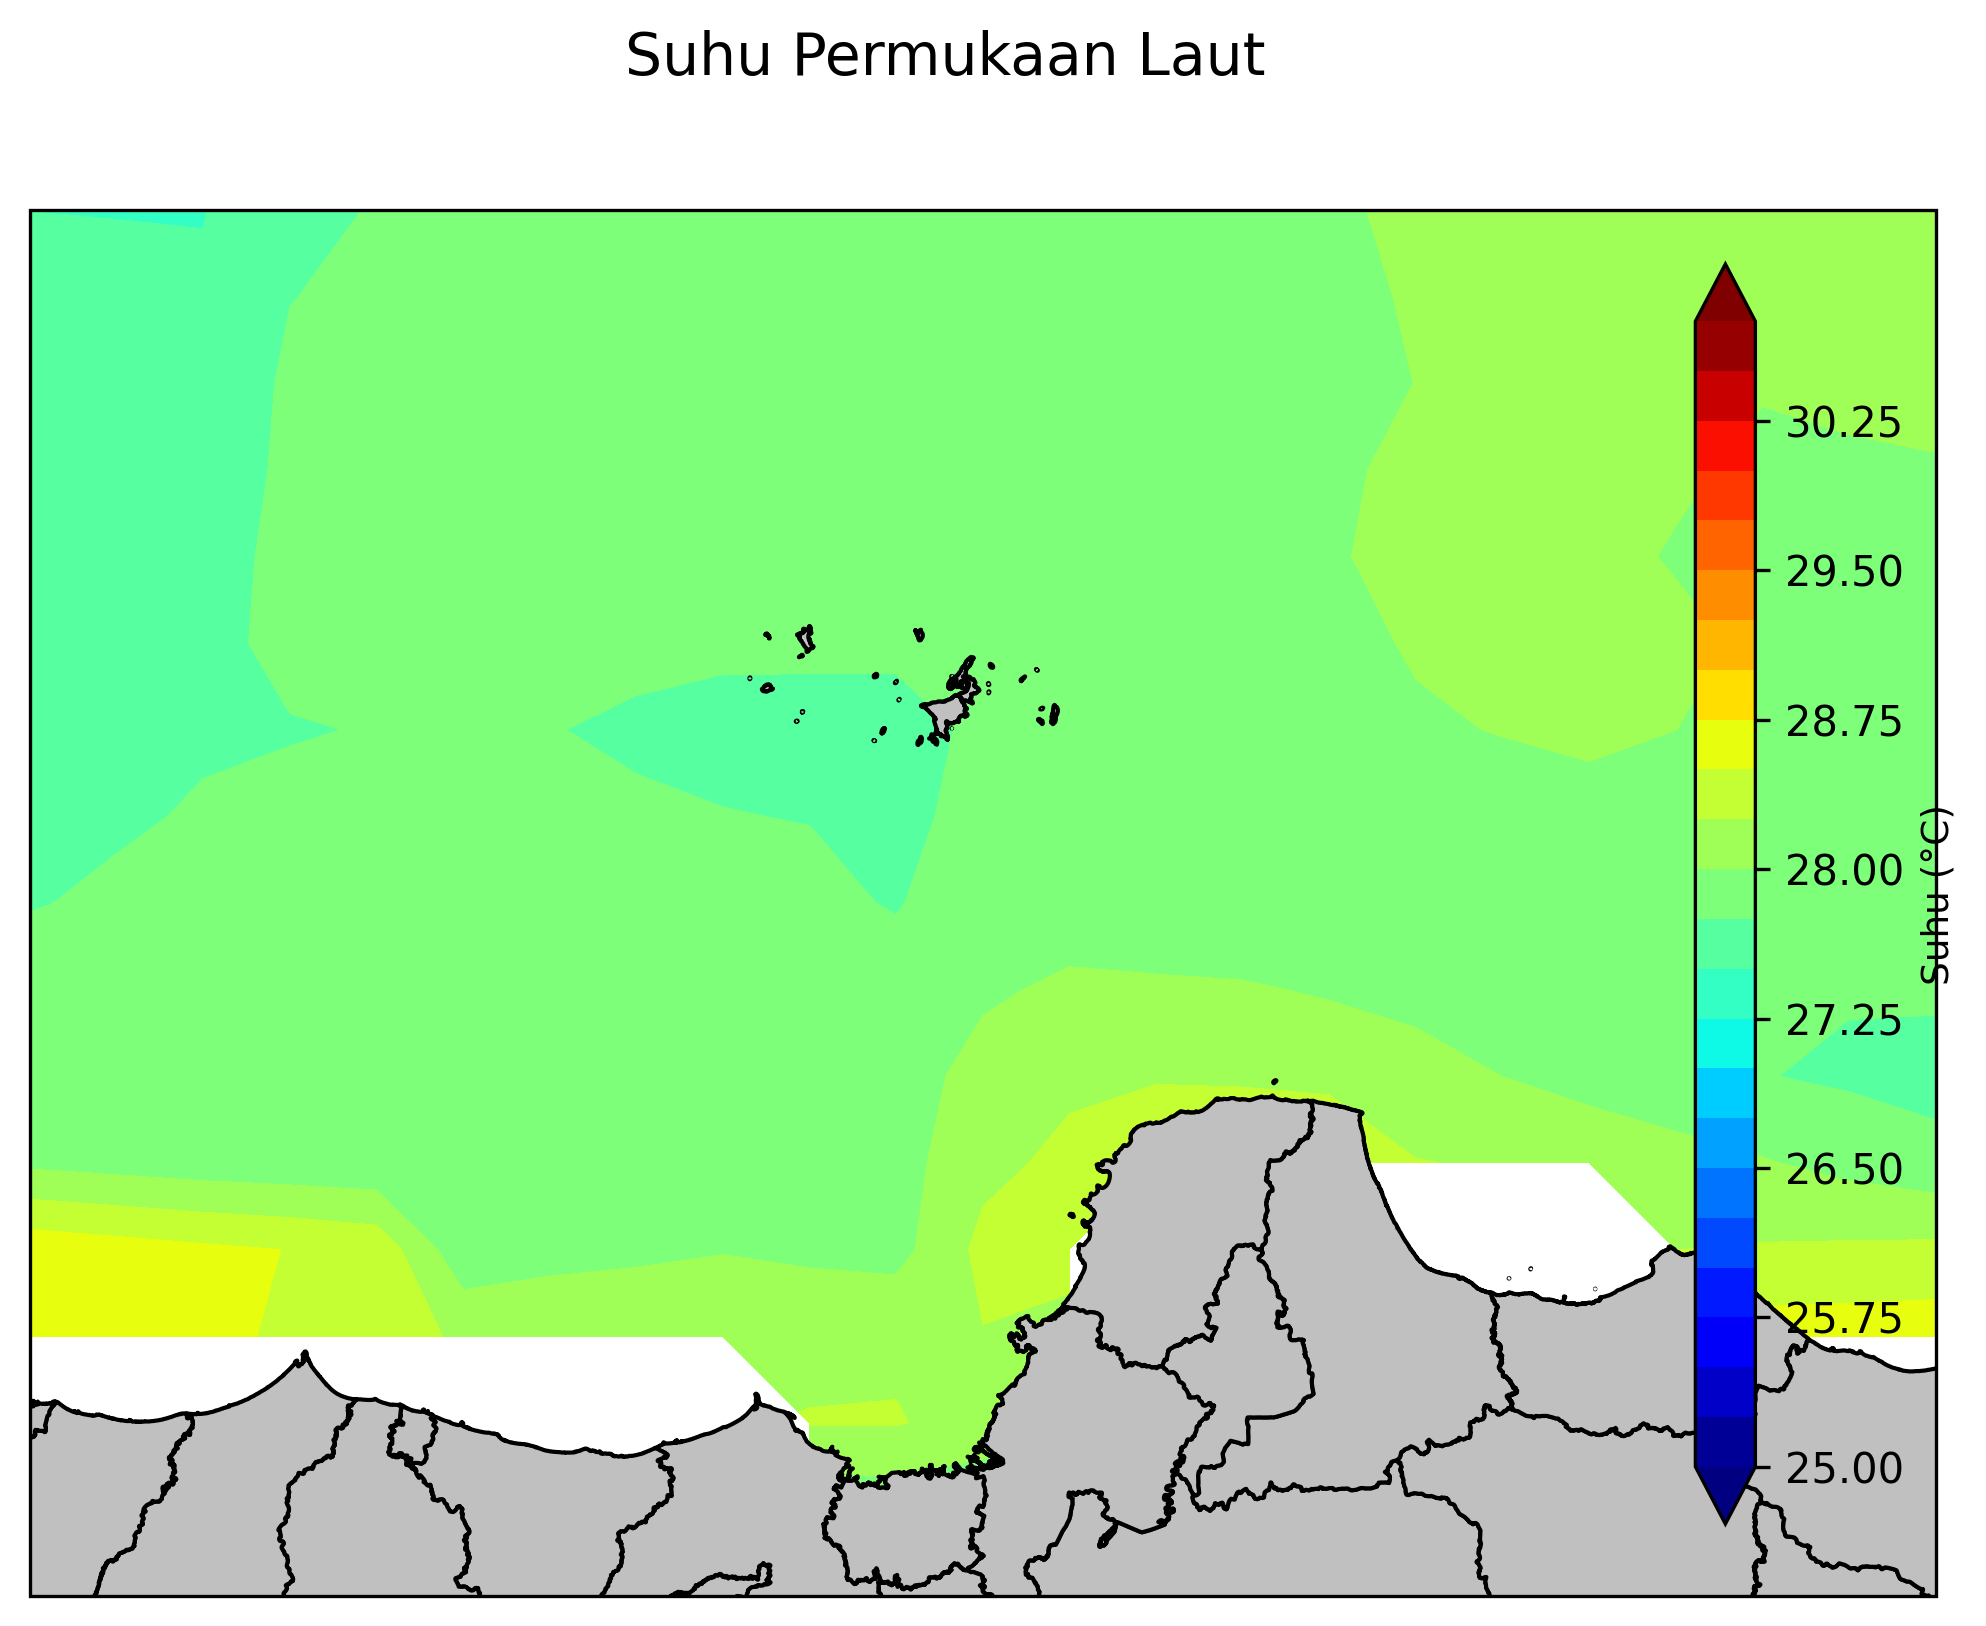

In [11]:
fig = plt.figure(figsize=(10, 6), dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

cmap = cm.jet
mesh = ax.contourf(lon, lat, sst[0, 0],
                   cmap=cmap, levels= np.arange(25, 31, 0.25),
                   transform=ccrs.PlateCarree(),
                   extend='both')

shape_feature = ShapelyFeature(Reader('/content/drive/MyDrive/Colab Notebooks/Shapefile/LapakGIS_Batas_Kabupaten_2024.shp').geometries(),
                               ccrs.PlateCarree(), edgecolor="black", facecolor="silver") # Membaca shapefile
ax.add_feature(shape_feature, linewidth=1.0) # Menambahkan shapefile ke peta
#ax.add_feature(cfeature.COASTLINE, linewidth=2)
#ax.add_feature(cfeature.BORDERS, linewidth=2, linestyle='--')
#ax.set_extent([111, 116, -10, -5], crs=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.75, 0.15, 0.02, 0.7])
cbar = fig.colorbar(mesh, cax=cbar_ax).set_label(label='Suhu (°C)', size=9)

plt.suptitle('Suhu Permukaan Laut',
            fontsize=14)
plt.show()

/tmp/ipython-input-4265001983.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


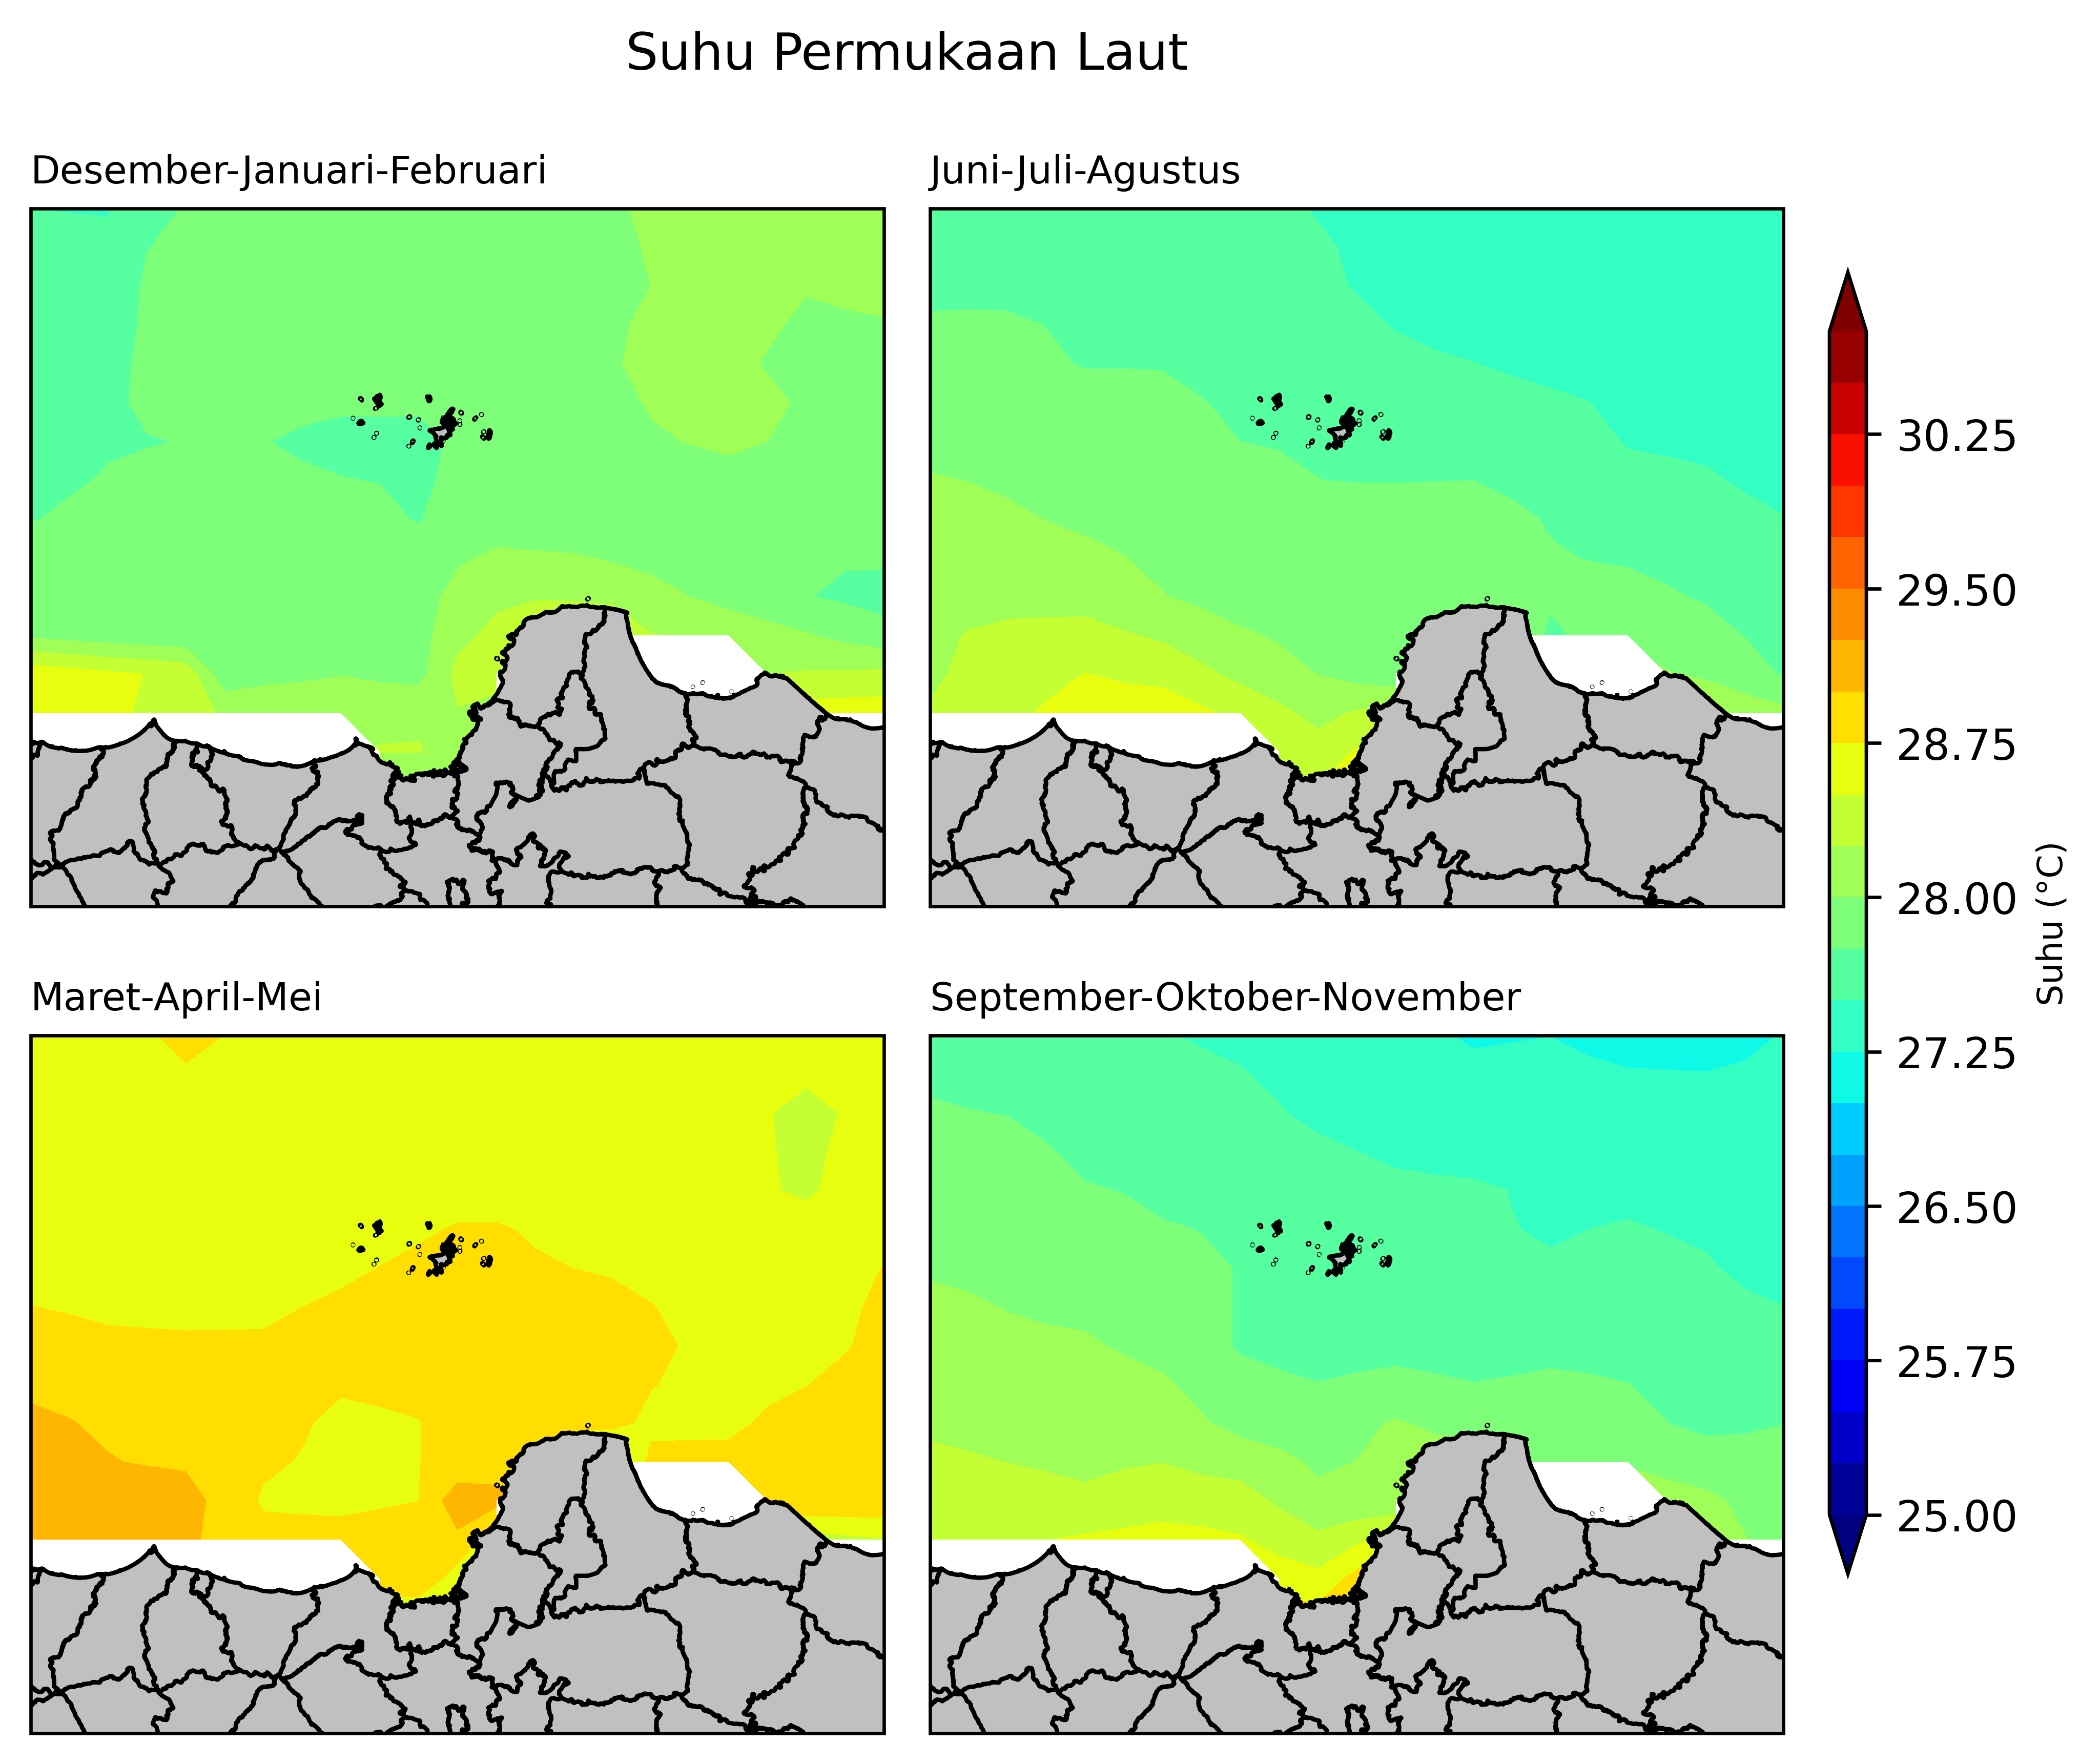

In [12]:
fig = plt.figure(figsize=(6, 6.05), dpi=600) # Add this line to create a figure

cmap = cm.jet # Define the colormap

title = ['Desember-Januari-Februari', 'Juni-Juli-Agustus', 'Maret-April-Mei', 'September-Oktober-November']

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection=ccrs.PlateCarree())
    mesh = ax.contourf(lon, lat, sst[i, 0],
    levels= np.arange(25, 31, 0.25), cmap=cmap,
    transform=ccrs.PlateCarree(), extend = 'both')

    shape_feature = ShapelyFeature(Reader('/content/drive/MyDrive/Colab Notebooks/Shapefile/LapakGIS_Batas_Kabupaten_2024.shp').geometries(),
                                   ccrs.PlateCarree(), edgecolor="black", facecolor="silver") # Membaca shapefile
    ax.add_feature(shape_feature, linewidth=1.0) # Menambahkan shapefile ke peta
    #ax.add_feature(cfeature.COASTLINE, linewidth=2)
    #ax.add_feature(cfeature.BORDERS, linewidth=2, linestyle='--')
    ax.set_extent([109.125, 111.875, -7.375, -5.125], crs=ccrs.PlateCarree())
    # Now you can use pd.to_datetime
    plt.title(title[i], fontsize=9, loc='left') # Changed time to data.time to access the time variable from your xarray dataset

cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
cbar = fig.colorbar(mesh, cax=cbar_ax)
cbar.set_label(label='Suhu (°C)', size=8)

plt.suptitle('Suhu Permukaan Laut',
            fontsize=12, ha='center')
plt.tight_layout()
plt.show()

In [ ]:
import os
os.listdir('/content/drive/MyDrive/Colab Notebooks/data_skripsi/SLA')

['SLA_DJF_timmin.nc',
 'SLA_JJA_timmin.nc',
 'SLA_MAM_timmin.nc',
 'SLA_SON_timmin.nc']